In [ ]:
!nvidia-smi

Wed Jul 20 08:36:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |   8324MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/train'
valid_path = '/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/train/*')

In [ ]:
folders

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 952 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 147 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
30/30 [==============================] - 17s 488ms/step - loss: 6.0923 - accuracy: 0.2511 - val_loss: 2.1914 - val_accuracy: 0.3129
Epoch 2/15
30/30 [==============================] - 14s 471ms/step - loss: 1.5182 - accuracy: 0.4800 - val_loss: 1.2723 - val_accuracy: 0.6395
Epoch 3/15
30/30 [==============================] - 14s 452ms/step - loss: 1.2840 - accuracy: 0.5294 - val_loss: 0.8482 - val_accuracy: 0.6939
Epoch 4/15
30/30 [==============================] - 14s 482ms/step - loss: 1.0340 - accuracy: 0.6218 - val_loss: 0.8110 - val_accuracy: 0.7279
Epoch 5/15
30/30 [==============================] - 13s 446ms/step - loss: 0.8380 - accuracy: 0.6859 - val_loss: 1.1036 - val_accuracy: 0.4898
Epoch 6/15
30/30 [==============================] - 14s 453ms/step - loss: 0.8617 - accuracy: 0.7122 - val_loss: 1.0218 - val_accuracy: 0.7279
Epoch 7/15
30/30 [==============================] - 13s 446ms/step - loss: 0.8212 - accuracy: 0.7048 - val_loss: 0.6970 - val_accuracy: 0.7619

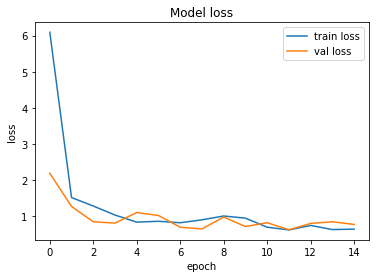

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title("Model loss")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()
plt.savefig('/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Resnet 50/LossVal_loss')

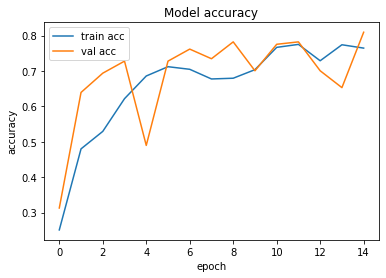

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title("Model accuracy")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()
plt.savefig('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Resnet 50/AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Resnet 50/model_resnet50.h5')